In [1]:
import gymnasium as gym
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append("..")

from agents.qagent import QAgent
from agents.q_learning import QLearning
from utils.reproducibility import set_global_seed

In [3]:
env = gym.make("Taxi-v3", render_mode="ansi")

In [4]:
set_global_seed(env, seed=42)

In [5]:
agent = QAgent(env)
learning = QLearning(env, agent, episode_count=5000)

In [6]:
rewards = learning.train(record_history=True)

print("Reward medio ultimi 50 episodi:", sum(rewards[-50:]) / 50)

Training: 100%|██████████| 5000/5000 [00:07<00:00, 709.52ep/s] 

Reward medio ultimi 50 episodi: 7.52


In [7]:
# primo episodio, primi 5 step
for i, frame in enumerate(learning.learning_history[0][:5], 1):
    print(f"Step {i}:\n{frame}\n")

Step 1:
{'frame': '+---------+\n|R: | : :G|\n| : | : : |\n| : : : : |\n|\x1b \x1b| : | : |\n|\x1bY\x1b| : |\x1bB\x1b: |\n+---------+\n  (South)\n', 'state': 214, 'action': np.int64(0), 'reward': -1, 'total_reward': -1, 'next_state': 314, 'done': False}

Step 2:
{'frame': '+---------+\n|R: | : :G|\n| : | : : |\n| : : : : |\n|\x1b \x1b| : | : |\n|\x1bY\x1b| : |\x1bB\x1b: |\n+---------+\n  (Pickup)\n', 'state': 314, 'action': np.int64(4), 'reward': -10, 'total_reward': -11, 'next_state': 314, 'done': False}

Step 3:
{'frame': '+---------+\n|R: | : :G|\n| : | : : |\n| : : : : |\n|\x1b \x1b| : | : |\n|\x1bY\x1b| : |\x1bB\x1b: |\n+---------+\n  (West)\n', 'state': 314, 'action': np.int64(3), 'reward': -1, 'total_reward': -12, 'next_state': 314, 'done': False}

Step 4:
{'frame': '+---------+\n|R: | : :G|\n| : | : : |\n| : : : : |\n|\x1b \x1b| : | : |\n|\x1bY\x1b| : |\x1bB\x1b: |\n+---------+\n  (East)\n', 'state': 314, 'action': np.int64(2), 'reward': -1, 'total_reward': -13, 'next_state': 31

In [8]:
learning.evaluate()

Average number of steps per episode: 13.1
Average total reward per episode: 7.9


(13.14, 7.86)

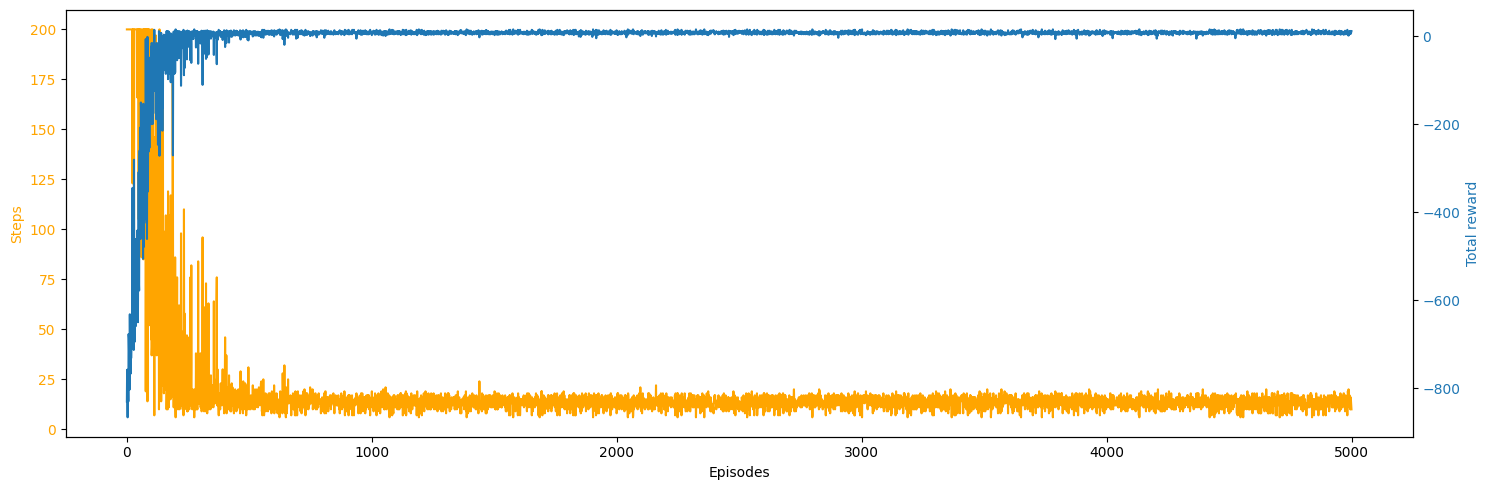

In [9]:
from utils.plotting import plot_learning_history

plot_learning_history(learning.learning_history)